In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [6]:
#Load dataset
glass=pd.read_csv("C:\\Users\\abhil\\Downloads\\Glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1. Exploratory Data Analysis (EDA):

In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Check for missing values

In [9]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Check for outliers

<Axes: >

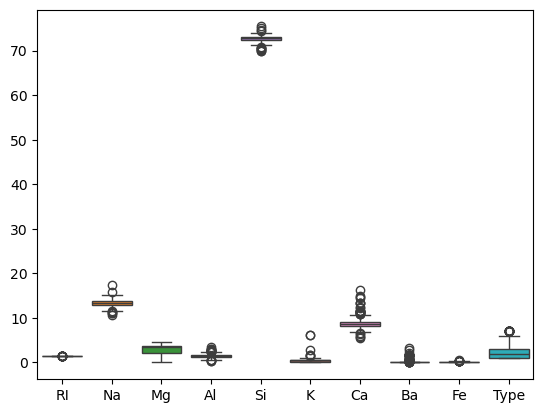

In [10]:
sns.boxplot(glass)

### Delete Outliers

In [11]:
Q1 = glass['K'].quantile(0.25)
Q3 = glass['K'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
glass= glass[(glass['K'] >= lower_bound) & (glass['K'] <= upper_bound)]

In [12]:
Q1 = glass['Fe'].quantile(0.25)
Q3 = glass['Fe'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
glass= glass[(glass['Fe'] >= lower_bound) & (glass['Fe'] <= upper_bound)]

### Replace outliers

In [13]:
Q1 = glass['RI'].quantile(0.25)
Q3 = glass['RI'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
glass['RI'] = glass['RI'].clip(lower=lower_bound, upper=upper_bound)

In [14]:
Q1 = glass['Na'].quantile(0.25)
Q3 = glass['Na'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
glass['Na'] = glass['Na'].clip(lower=lower_bound, upper=upper_bound)

In [15]:
Q1 = glass['Al'].quantile(0.25)
Q3 = glass['Al'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
glass['Al'] = glass['Al'].clip(lower=lower_bound, upper=upper_bound)

In [16]:
Q1 = glass['Ca'].quantile(0.25)
Q3 = glass['Ca'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
glass['Ca'] = glass['Ca'].clip(lower=lower_bound, upper=upper_bound)

In [17]:
Q1 = glass['Si'].quantile(0.25)
Q3 = glass['Si'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers 
glass['Si'] = glass['Si'].clip(lower=lower_bound, upper=upper_bound)

# 2. Data Visualization

<Axes: >

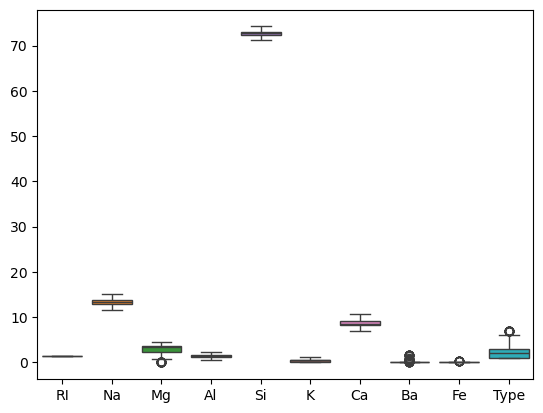

In [18]:
sns.boxplot(glass)

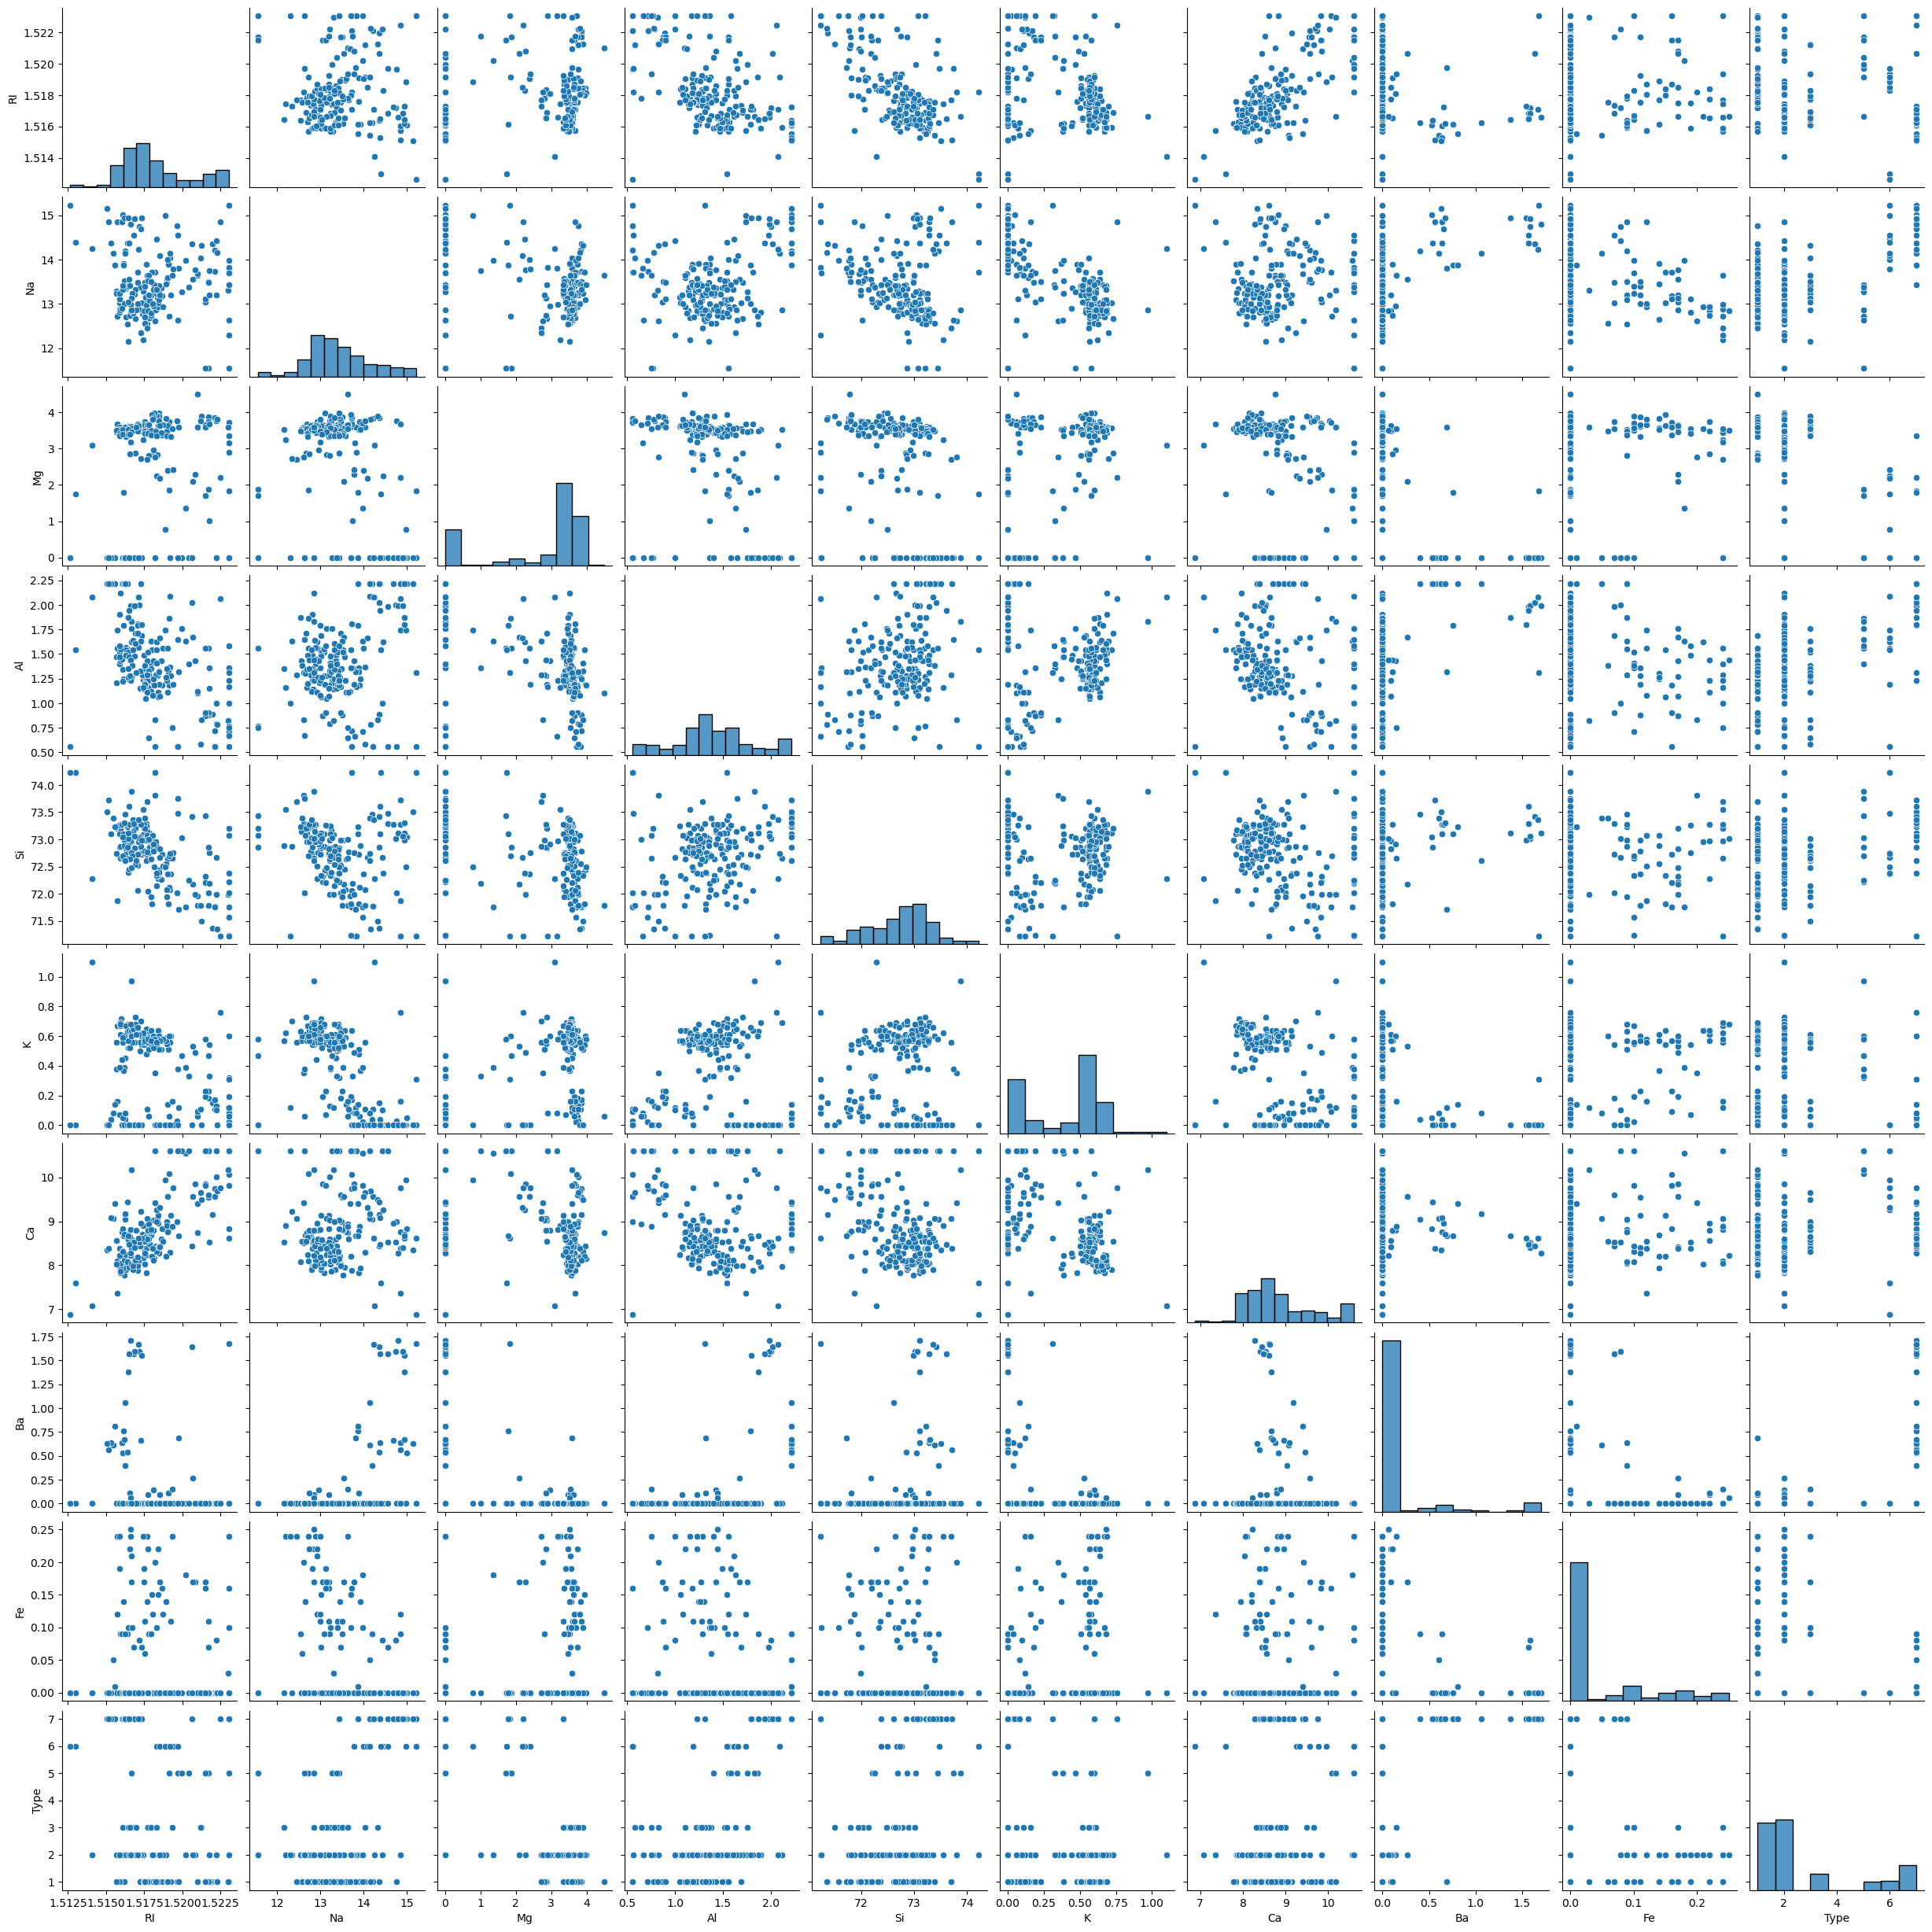

In [19]:
sns.pairplot(glass)

In [20]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.041077,-0.019843,-0.524447,-0.656871,-0.303303,0.756927,-0.135056,0.036234,-0.156131
Na,-0.041077,1.000000,-0.414454,0.258011,-0.191354,-0.607717,-0.029249,0.538178,-0.199463,0.573595
Mg,-0.019843,-0.414454,1.000000,-0.450681,-0.293395,0.556753,-0.433464,-0.589684,0.121999,-0.777738
Al,-0.524447,0.258011,-0.450681,1.000000,0.310729,0.052439,-0.264649,0.487296,-0.116253,0.603676
Si,-0.656871,-0.191354,-0.293395,0.310729,1.000000,0.103085,-0.327017,0.178330,-0.023049,0.255263
K,-0.303303,-0.607717,0.556753,0.052439,0.103085,1.000000,-0.433487,-0.462625,0.107292,-0.507137
Ca,0.756927,-0.029249,-0.433464,-0.264649,-0.327017,-0.433487,1.000000,-0.073574,0.033795,0.149024
Ba,-0.135056,0.538178,-0.589684,0.487296,0.178330,-0.462625,-0.073574,1.000000,-0.107613,0.672465
Fe,0.036234,-0.199463,0.121999,-0.116253,-0.023049,0.107292,0.033795,-0.107613,1.000000,-0.212179
Type,-0.156131,0.573595,-0.777738,0.603676,0.255263,-0.507137,0.149024,0.672465,-0.212179,1.000000


# 3. Data Preprocessing

In [21]:
X=glass.iloc[:,0:9]
Y=glass['Type']

In [22]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.1000,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.3600,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.5400,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.2900,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.2400,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.2175,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.9900,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.0200,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.9400,73.61,0.00,8.48,1.57,0.0


In [23]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 195, dtype: int64

In [24]:
Y.value_counts()

Type
2    70
1    67
7    25
3    16
6     9
5     8
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=3)
# Fit and transform the training data
X1,Y1 = smote.fit_resample(X, Y)

In [26]:
Y1.value_counts()

Type
1    70
2    70
3    70
5    70
6    70
7    70
Name: count, dtype: int64

#### Standardization of data

In [27]:
def get_standardized(i):
    return (i-i.mean())/i.std()

In [28]:
X1_stand= get_standardized(X1)
X1_stand

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.309136,0.051093,1.567345,-0.998025,-1.837091,-0.987296,-0.392105,-0.398703,-0.486283
1,-0.264130,0.362382,0.988531,-0.345195,-0.141366,0.534219,-1.421871,-0.398703,-0.486283
2,-0.925827,-0.085874,0.956014,0.106764,0.322727,0.208180,-1.477836,-0.398703,-0.486283
3,-0.240994,-0.484323,1.047063,-0.520957,-0.355563,0.860258,-0.985340,-0.398703,-0.486283
4,-0.352048,-0.409614,1.001538,-0.646501,0.483375,0.787805,-1.153236,-0.398703,-0.486283
...,...,...,...,...,...,...,...,...,...
415,-0.525686,1.523644,-1.352739,1.251044,0.406779,-1.204656,-0.700516,3.492615,0.284950
416,-1.132532,1.557730,-1.352739,1.807888,1.096255,-1.204656,-0.515843,1.103824,0.534948
417,-0.479014,1.073957,-1.352739,1.373225,0.713013,-1.204656,-0.582458,3.601250,0.113078
418,-0.933877,1.733205,-1.352739,1.807888,0.455086,-1.034668,-0.294296,0.917979,-0.486283


# 4. Random Forest model implementation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test,y_train,y_test = train_test_split(X1_stand,Y1, test_size=0.2,random_state= 3)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(336, 9) (336,) (84, 9) (84,)


In [31]:
model = RandomForestClassifier(n_estimators= 50, max_features= 4, min_samples_split= 7, max_depth= 10, criterion= 'entropy', random_state= 7)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=4,
                       min_samples_split=7, n_estimators=50, random_state=7)

In [32]:
print(classification_report(y_train,model.predict(x_train)))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        55
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        54

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



In [33]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.94      0.88      0.91        17
           3       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        12
           6       0.90      1.00      0.95         9
           7       1.00      0.94      0.97        16

    accuracy                           0.96        84
   macro avg       0.96      0.97      0.97        84
weighted avg       0.97      0.96      0.96        84



# 5. Bagging and Boosting method

### Bagging

In [34]:
model1 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators= 50, max_features=5, random_state=7)
model1.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=5,
                  n_estimators=50, random_state=7)

In [35]:
print(classification_report(y_train,model1.predict(x_train)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        58
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        54

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336



In [36]:
print(classification_report(y_test,model1.predict(x_test)))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       0.93      0.82      0.88        17
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        12
           6       0.90      1.00      0.95         9
           7       1.00      0.94      0.97        16

    accuracy                           0.95        84
   macro avg       0.95      0.96      0.95        84
weighted avg       0.95      0.95      0.95        84



### Boosting

In [37]:
model2 = AdaBoostClassifier(n_estimators= 50, learning_rate= 0.01)
model2.fit(x_train, y_train)

C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.01)

In [38]:
print(classification_report(y_train,model2.predict(x_train)))

              precision    recall  f1-score   support

           1       0.67      0.07      0.13        55
           2       0.00      0.00      0.00        53
           3       0.35      0.96      0.51        55
           5       0.91      1.00      0.95        58
           6       0.98      1.00      0.99        61
           7       1.00      0.94      0.97        54

    accuracy                           0.68       336
   macro avg       0.65      0.66      0.59       336
weighted avg       0.66      0.68      0.61       336



C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print(classification_report(y_test,model2.predict(x_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        17
           3       0.34      0.93      0.50        15
           5       0.71      1.00      0.83        12
           6       0.82      1.00      0.90         9
           7       1.00      0.88      0.93        16

    accuracy                           0.58        84
   macro avg       0.48      0.63      0.53        84
weighted avg       0.44      0.58      0.48        84



C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abhil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 1. Explain Bagging and Boosting methods. How is it different from each other.


Bagging and boosting are two powerful ensemble learning techniques that address model performance from different angles. Bagging works by training multiple models on various subsets of the data sampled with replacement, and then combines their predictions to reduce variance and mitigate overfitting. This parallel approach enhances model stability by averaging predictions, making it robust to fluctuations in individual models. In contrast, boosting builds models sequentially, where each new model is trained to correct the errors of its predecessors. This method focuses on reducing both bias and variance by assigning more weight to misclassified examples, thereby refining the overall predictive accuracy. While bagging aggregates predictions independently, boosting integrates predictions with a weighted emphasis on model performance, leading to a more nuanced improvement in accuracy and generalization.

#### 2. Explain how to handle imbalance data.

To effectively handle imbalanced data, several strategies can be employed to ensure robust model performance. Resampling techniques, such as oversampling the minority class with methods like SMOTE (Synthetic Minority Over-sampling Technique) or undersampling the majority class, can help balance the class distribution. Adjusting class weights or using cost-sensitive learning approaches can further guide the model to pay more attention to the minority class, improving its performance on less frequent but critical cases. Ensemble methods, such as Balanced Random Forest, are also useful for enhancing model accuracy by addressing class imbalance within the learning process. Additionally, evaluating model performance with metrics specifically designed for imbalanced datasets, such as Precision, Recall, F1-score, and ROC-AUC, provides a more nuanced assessment of how well the model handles minority classes and avoids misleading conclusions that can arise from accuracy alone.